In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



df=pd.read_csv(r"C:/Users/Lenovo/My Project/car_sales.csv")


In [2]:
df.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [9]:
df.shape

(23906, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [11]:
df.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [12]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [5]:
df.dropna

<bound method DataFrame.dropna of              Car_id        Date  cust_name  Gender  annual_income  \
0      C_CND_000001    1/2/2022  Geraldine    Male          13500   
1      C_CND_000002    1/2/2022        Gia    Male        1480000   
2      C_CND_000003    1/2/2022     Gianna    Male        1035000   
3      C_CND_000004    1/2/2022    Giselle    Male          13500   
4      C_CND_000005    1/2/2022      Grace    Male        1465000   
...             ...         ...        ...     ...            ...   
23901  C_CND_023902  12/31/2023     Martin    Male          13500   
23902  C_CND_023903  12/31/2023      Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023       Emma    Male         705000   
23904  C_CND_023905  12/31/2023   Victoire    Male          13500   
23905  C_CND_023906  12/31/2023    Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   

In [50]:
df.rename(columns={"Customer Name":"cust_name", "Annual Income":"annual_income", "Price ($)":"price", "Body Style":"body_style"}, inplace =True)

In [14]:
df.describe()

,annual_income,price,Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [6]:
x = ['Car_id','cust_name','Phone','Dealer_No ']
df = df.drop(x,axis=1)

In [52]:
df.sort_values('price',ascending=False).reset_index(drop=True)

,Car_id,Date,cust_name,Gender,annual_income,Dealer_Name,Company,Model,Engine,Transmission,Color,price,Dealer_No,body_style,Phone,Dealer_Region
0,C_CND_007069,10/20/2022,Dariel,Male,1388000,Star Enterprises Inc,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85800,99301-3882,Passenger,6544024,Aurora
1,C_CND_017130,8/26/2023,Akiva,Male,5046000,Rabun Used Car Sales,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85601,85257-3102,Passenger,6296288,Austin
2,C_CND_000359,2/6/2022,Matthew,Male,1326000,Star Enterprises Inc,Toyota,RAV4,Overhead Camshaft,Manual,Black,85600,99301-3882,Hatchback,8706152,Pasco
3,C_CND_013606,5/10/2023,Gabriella,Male,1036000,Hatfield Volkswagen,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85600,99301-3882,Passenger,7918569,Pasco
4,C_CND_009229,12/4/2022,Julius,Male,497500,Hatfield Volkswagen,Audi,A6,Overhead Camshaft,Manual,Black,85500,99301-3882,SUV,6621973,Pasco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_013950,5/23/2023,Sammy,Female,680000,McKinney Dodge Chrysler Jeep,Ford,Explorer,DoubleÂ Overhead Camshaft,Auto,Pale White,4200,85257-3102,Hatchback,8216636,Scottsdale
23902,C_CND_014021,5/26/2023,Oweis,Male,13500,Ryder Truck Rental and Leasing,Mercedes-B,CL500,Overhead Camshaft,Manual,Black,2200,06457-3834,SUV,8583796,Middletown
23903,C_CND_014011,5/26/2023,Fatima,Male,13500,Ryder Truck Rental and Leasing,Lincoln,Town car,Overhead Camshaft,Manual,Black,1700,06457-3834,Hatchback,7469239,Middletown
23904,C_CND_013997,5/25/2023,Amelia,Male,1955000,Rabun Used Car Sales,Mercedes-B,S-Class,DoubleÂ Overhead Camshaft,Auto,Red,1450,85257-3102,SUV,8719322,Scottsdale


In [8]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Date,Gender,annual_income,Dealer_Name,Company,Model,Engine,Transmission,Color,price,body_style,Dealer_Region


In [9]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Date', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine',
       'Transmission', 'Color', 'body_style', 'Dealer_Region'],
      dtype='object')
Numerical Variables:
['annual_income', 'price']


annual_income
Skew : 1.74


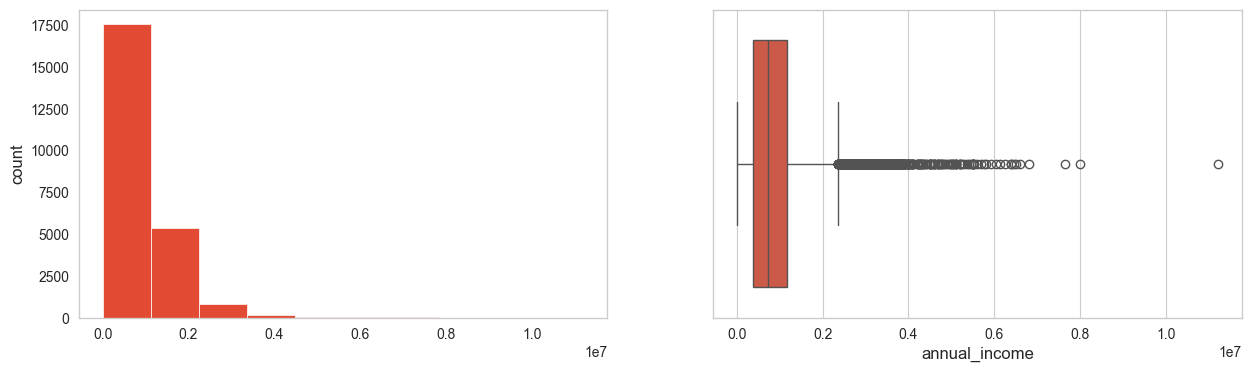

price
Skew : 1.47


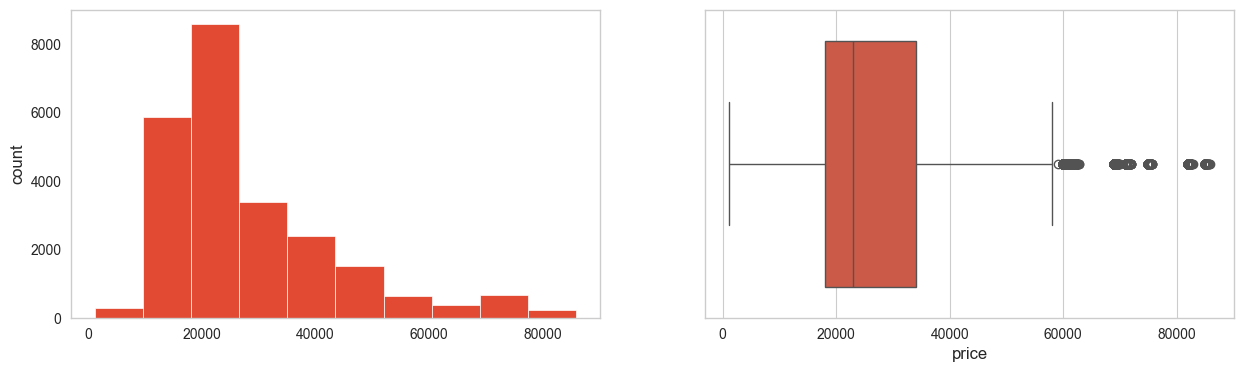

In [124]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Text(0.5, 1.0, 'Most interested in buying cars ')

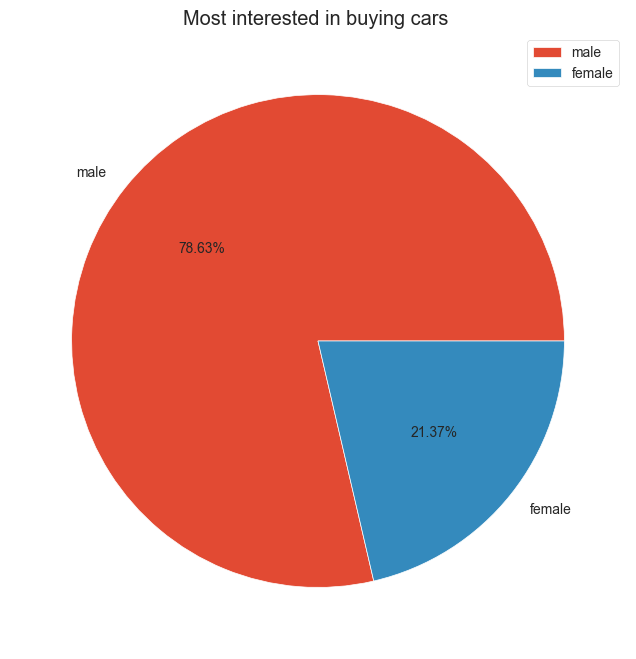

In [102]:
plt.pie(df.Gender.value_counts(),labels=['male','female'],wedgeprops={'edgecolor':'white'},autopct='%1.2f%%')
plt.legend()
plt.title('Most interested in buying cars ')

In [98]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [99]:
df['Month']=pd.to_datetime(df['Date']).dt.month

Text(0.5, 1.0, 'Cars sold in a month')

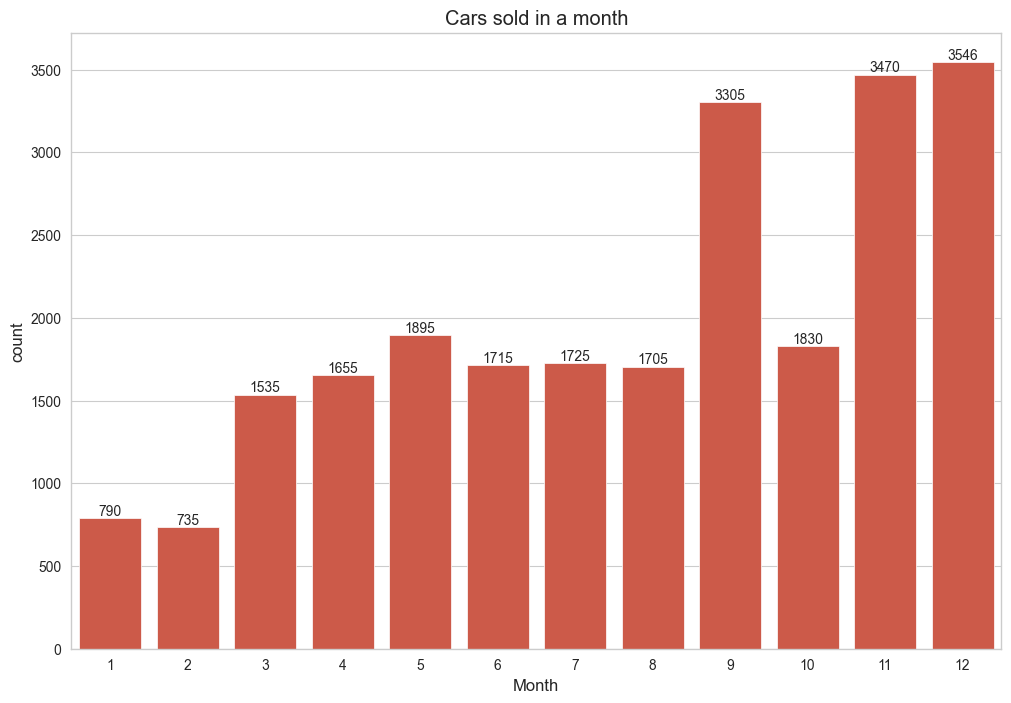

In [110]:
ax= sns.countplot(data=df,x='Month')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Cars sold in a month")


Text(0.5, 1.0, 'Most popular company')

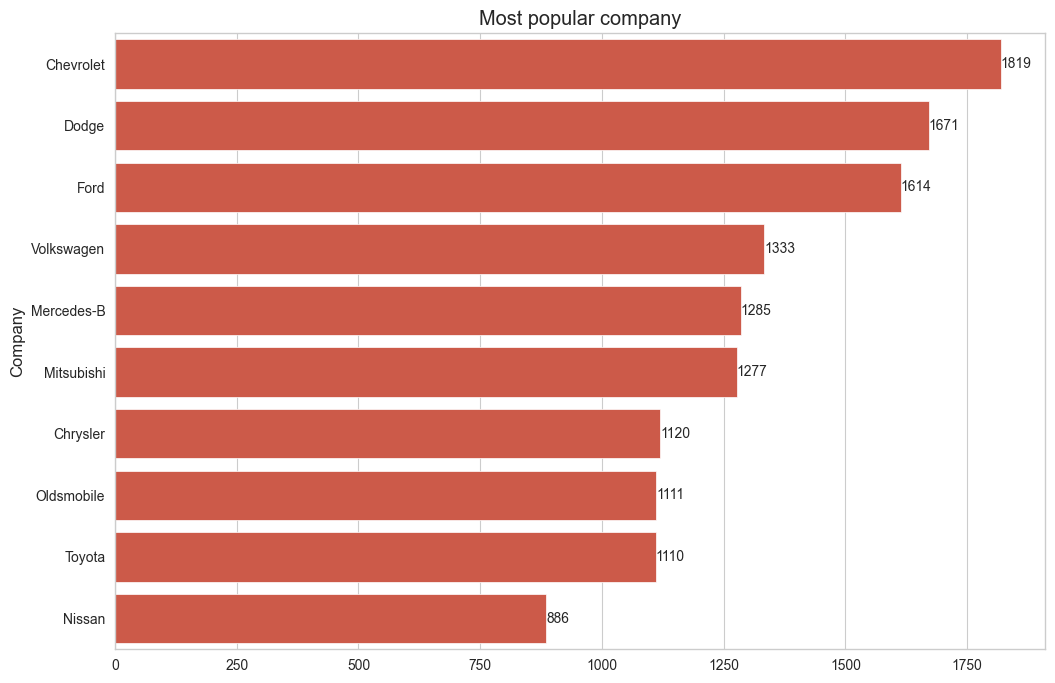

In [106]:
Company = df['Company'].value_counts().sort_values(ascending=False).head(10)
ax = sns.barplot(x=Company.values, y=Company.index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Most popular company")

Text(0.5, 1.0, 'Least  popular company')

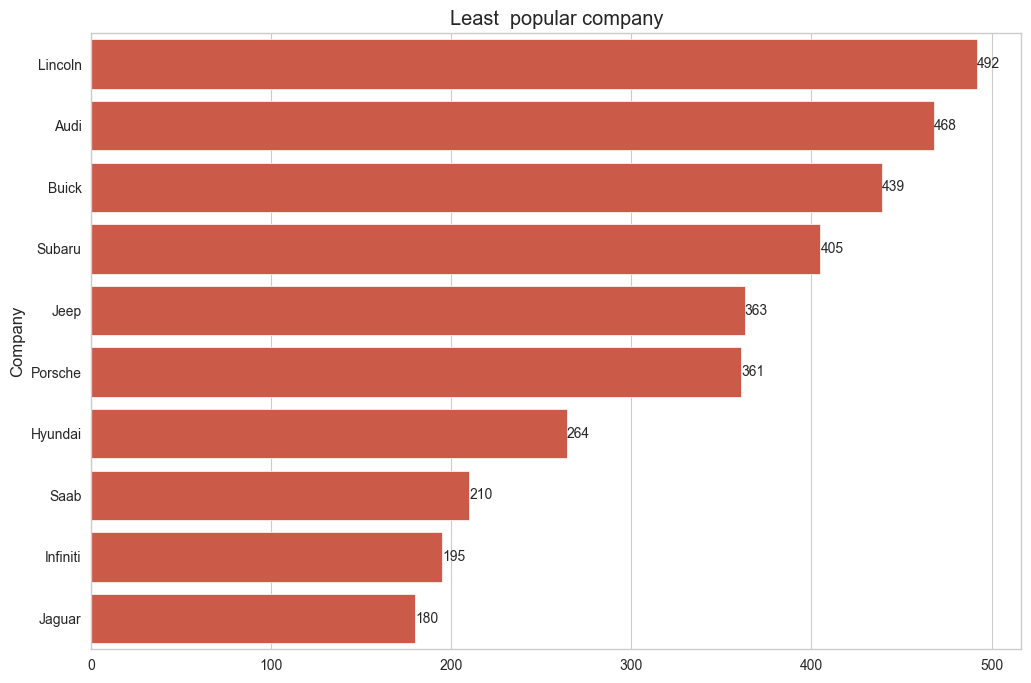

In [107]:
Company = df['Company'].value_counts().sort_values(ascending=False).tail(10)
ax = sns.barplot(x=Company.values, y=Company.index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Least  popular company")

Text(0.5, 1.0, 'Most popular models')

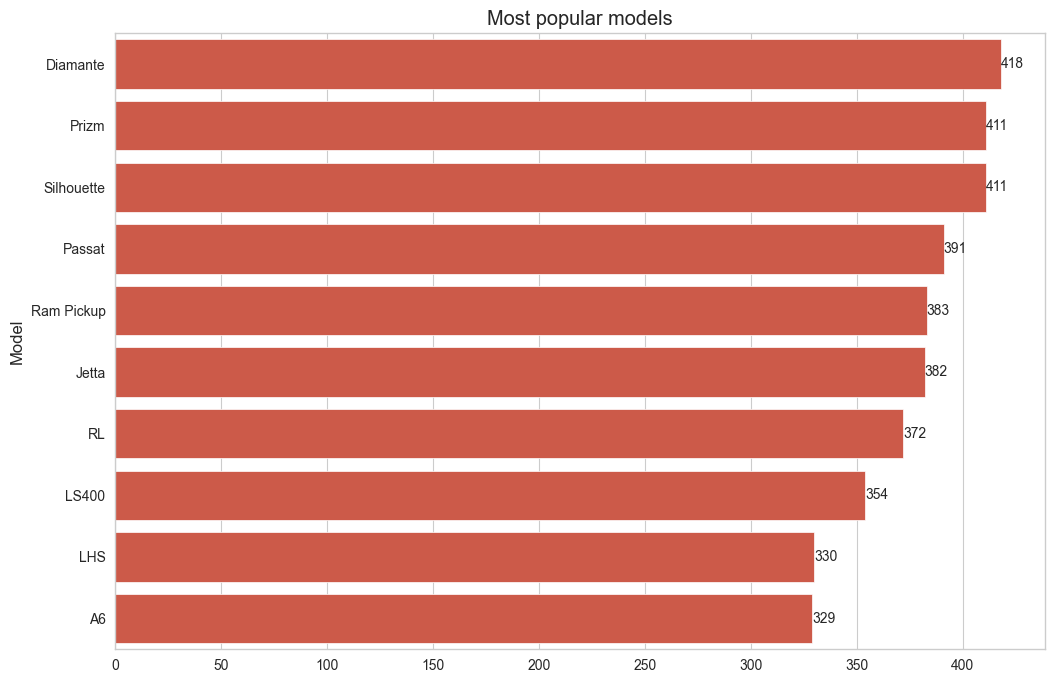

In [104]:
Model = df['Model'].value_counts().sort_values(ascending=False).head(10)
ax = sns.barplot(x=Model.values, y=Model.index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Most popular models")

Text(0.5, 1.0, 'Least popular models')

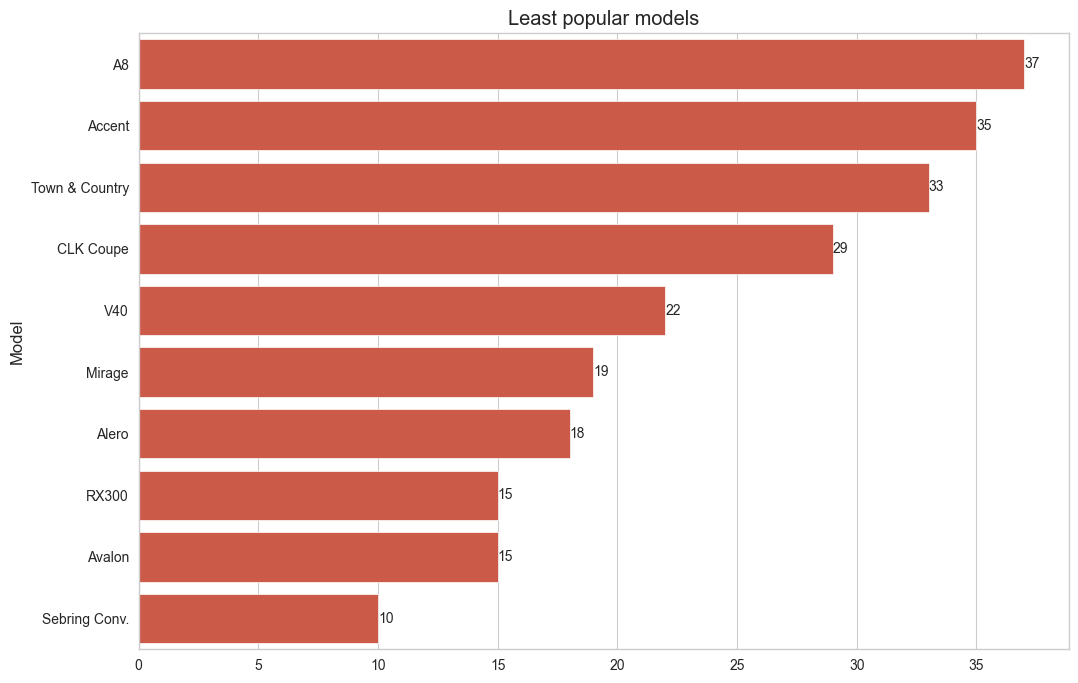

In [109]:
Model = df['Model'].value_counts().sort_values(ascending=False).tail(10)
ax = sns.barplot(x=Model.values, y=Model.index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Least popular models")

Text(0.5, 1.0, 'Cars sold based on Transmission')

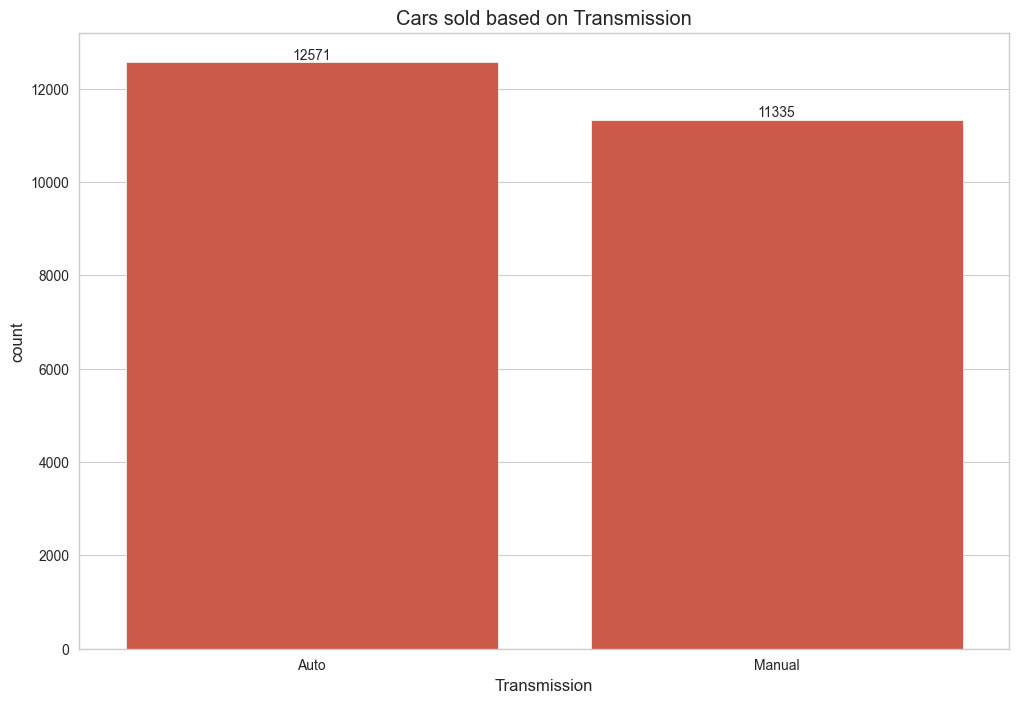

In [ ]:
ax= sns.countplot(data=df,x='Transmission')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Cars sold based on Transmission type")

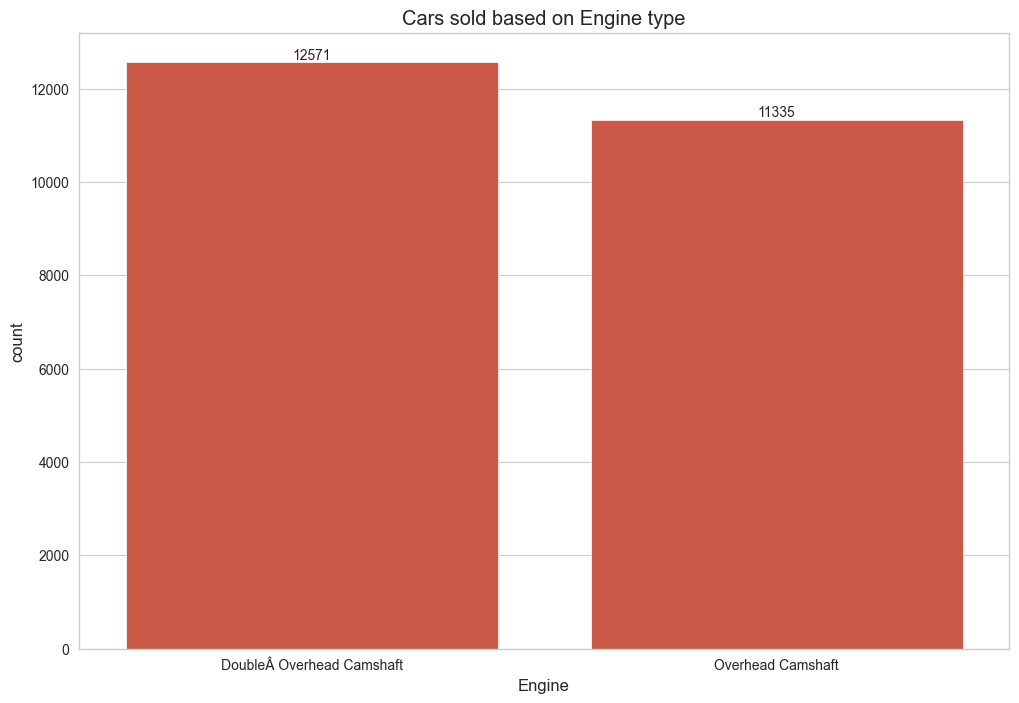

In [112]:
ax= sns.countplot(data=df,x='Engine')
for label in ax.containers:
    ax.bar_label(label)
    plt.title("Cars sold based on Engine type")

Text(0.5, 1.0, 'Cars sold based on Dealer Region')

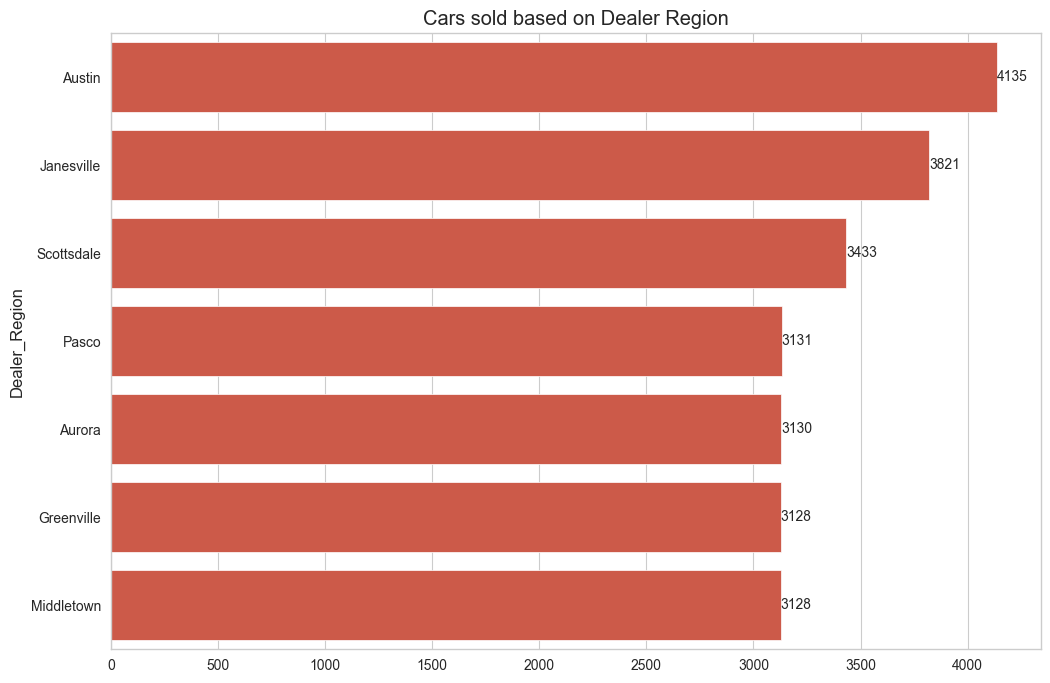

In [113]:
Dealer_region = df['Dealer_Region'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=Dealer_region.values, y=Dealer_region.index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Cars sold based on Dealer Region")

Text(0.5, 1.0, 'Top dealers')

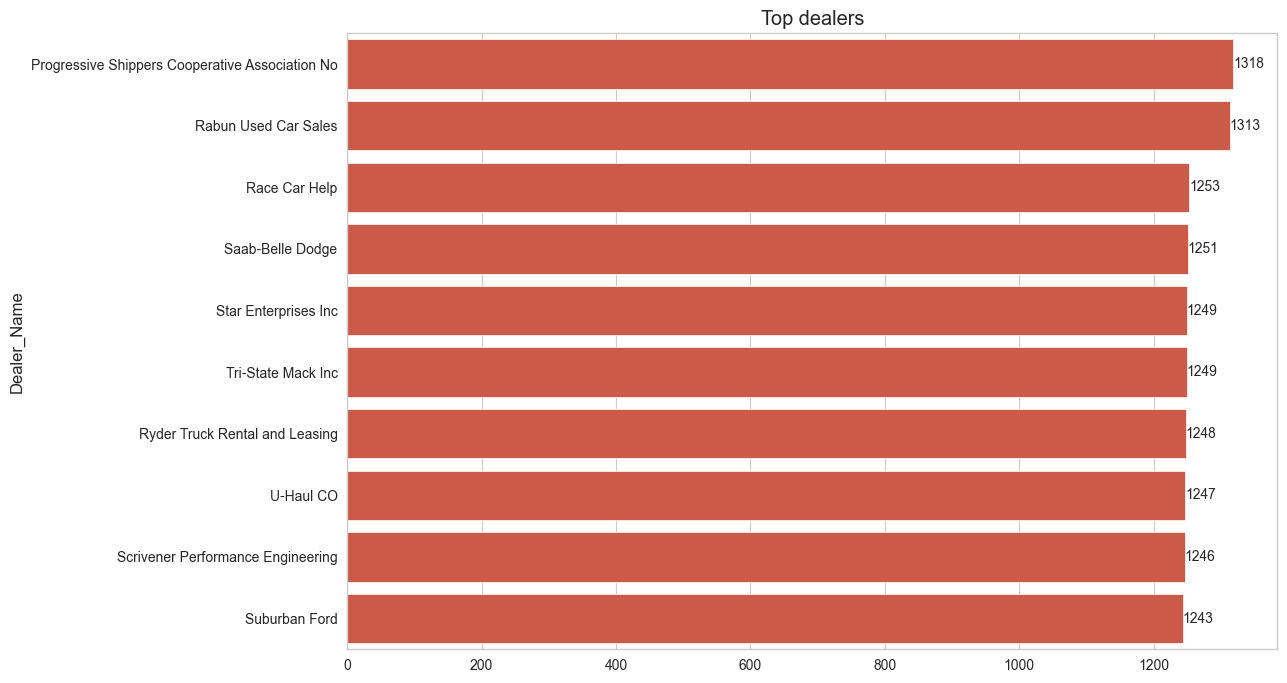

In [114]:
Dealer_Name = df['Dealer_Name'].value_counts().sort_values(ascending=False).head(10)
ax = sns.barplot(x=Dealer_Name.values, y=Dealer_Name.index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Top dealers")

In [63]:
df.columns

Index(['Date', 'Gender', 'annual_income', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'price', 'body_style',
       'Dealer_Region', 'Month'],
      dtype='object')

Text(0.5, 1.0, 'Popular colors ')

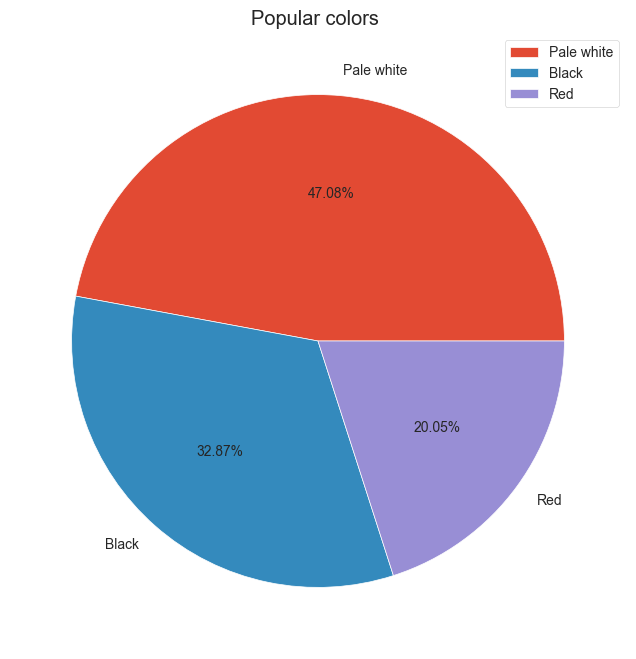

In [103]:
plt.pie(df.Color.value_counts(),labels=['Pale white','Black','Red'],wedgeprops={'edgecolor':'white'},autopct='%1.2f%%')
plt.legend()
plt.title('Popular colors ')

Text(0.5, 1.0, 'Cars sold based on body style')

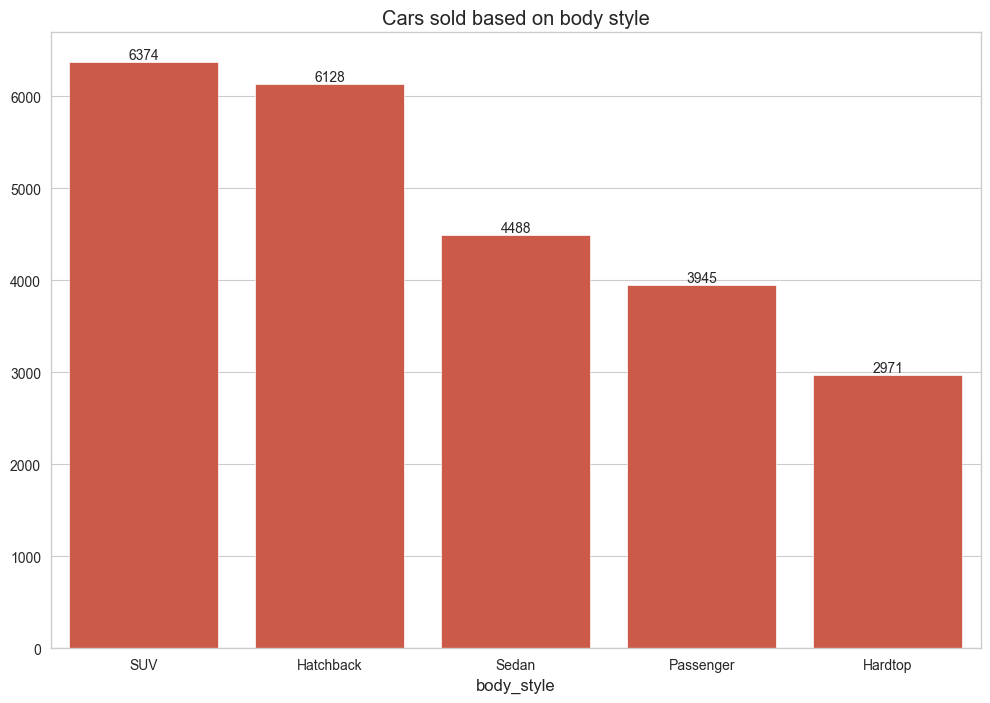

In [115]:
body_style = df['body_style'].value_counts().sort_values(ascending=False)
ax = sns.barplot(y=body_style.values, x=body_style.index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Cars sold based on body style")

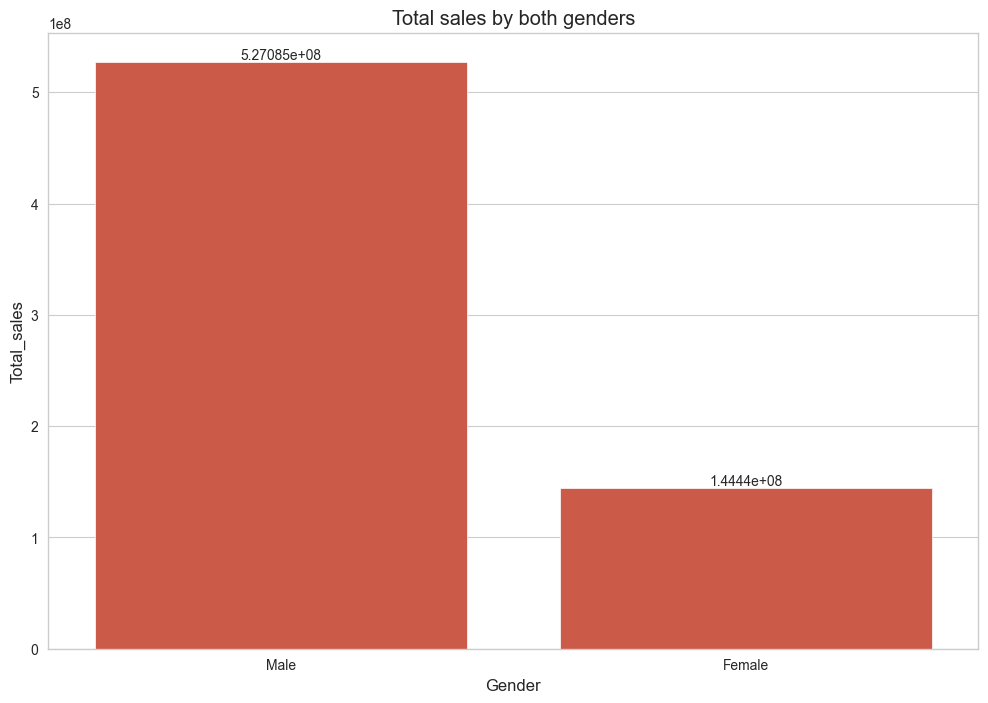

In [117]:
sales_by_Gender = df.groupby('Gender').agg(Total_sales = ("price",'sum'))
Gender_df=sales_by_Gender.sort_values(by ="Total_sales", ascending =False)
ax= sns.barplot(data=Gender_df, x='Gender', y='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Total sales by both genders")
plt.show()





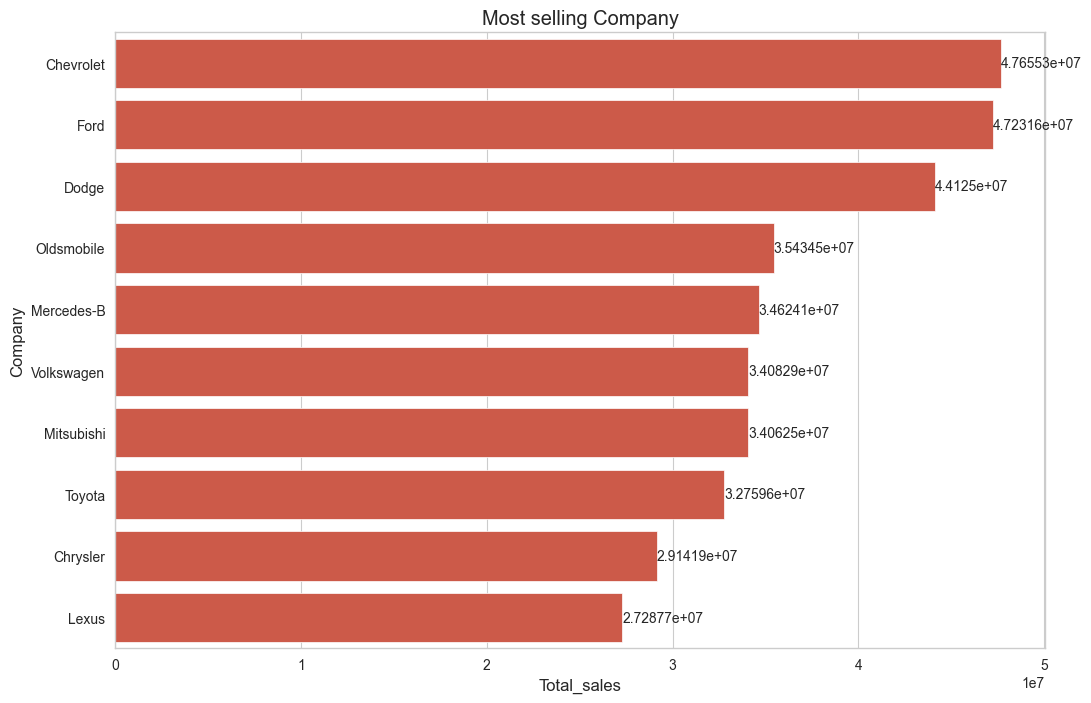

In [94]:
sales_by_company = df.groupby('Company').agg(Total_sales = ("price",'sum'))
company_df=sales_by_company.sort_values(by ="Total_sales", ascending =False).head(10)
ax= sns.barplot(data=company_df, y='Company', x='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Most selling Company")
plt.show()



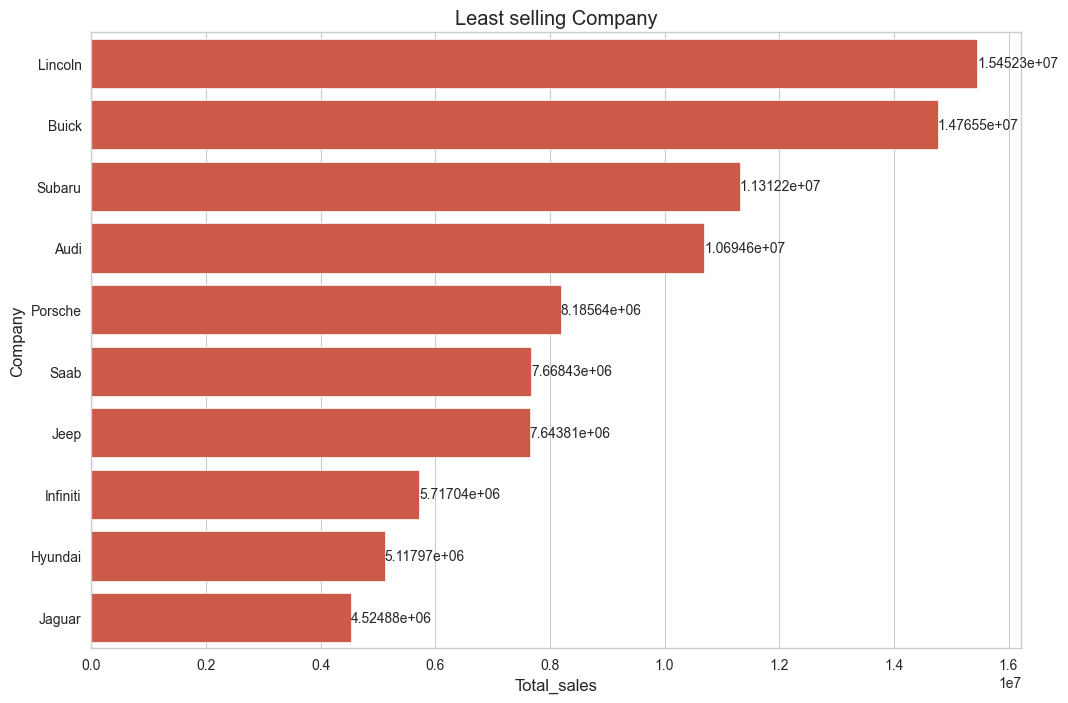

In [93]:
sales_by_company = df.groupby('Company').agg(Total_sales = ("price",'sum'))
company_df=sales_by_company.sort_values(by ="Total_sales", ascending =False).tail(10)
ax= sns.barplot(data=company_df, y='Company', x='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Least selling Company")
plt.show()

Text(0.5, 1.0, 'Monthly sales')

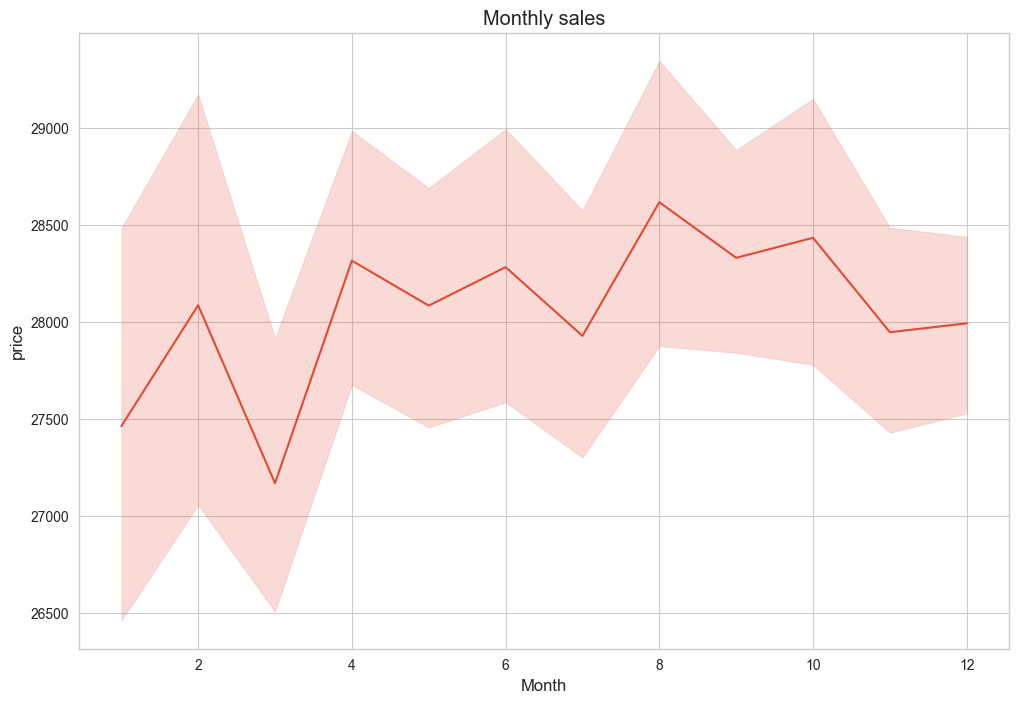

In [100]:
sns.lineplot(data=df,x='Month',y='price')
plt.title("Monthly sales")


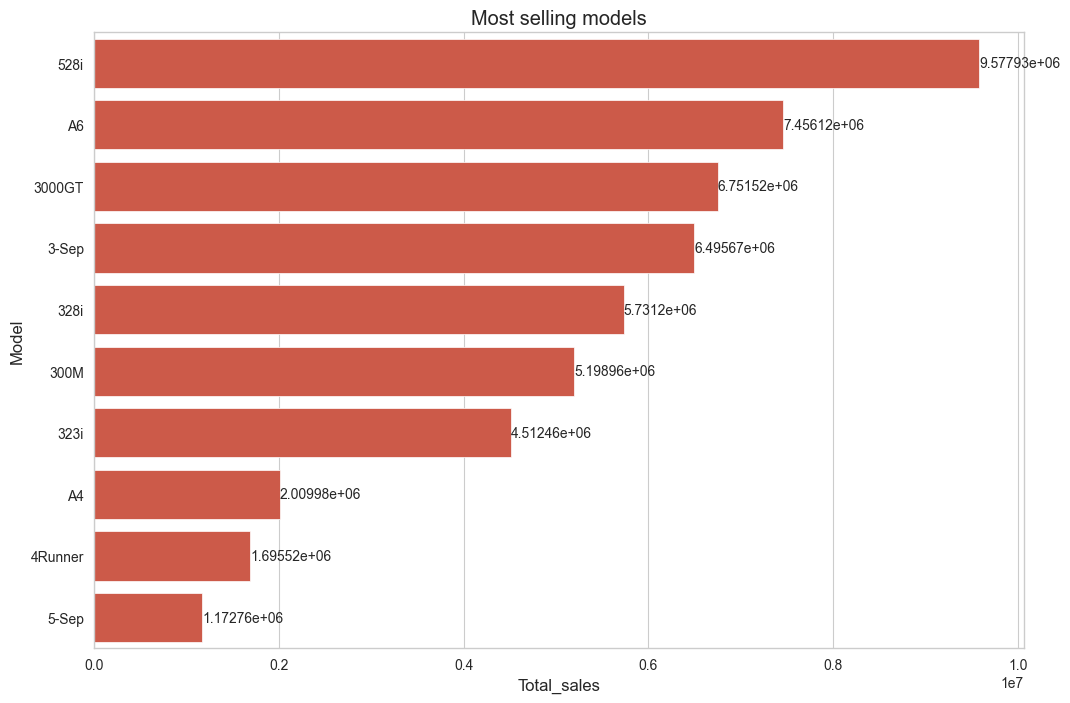

In [95]:
sales_by_Model = df.groupby('Model').agg(Total_sales = ("price",'sum')).head(10)
Model_df=sales_by_Model.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data=Model_df, y='Model', x='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Most selling models')
plt.show()


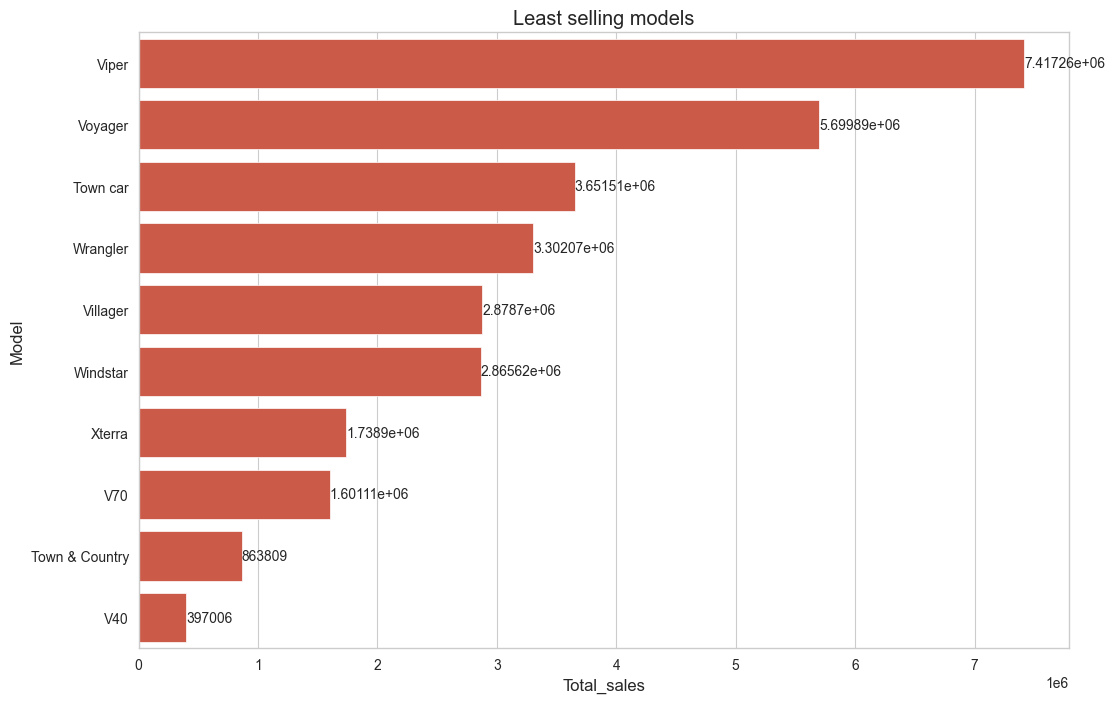

In [96]:
sales_by_Model = df.groupby('Model').agg(Total_sales = ("price",'sum')).tail(10)
Model_df=sales_by_Model.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data=Model_df, y='Model', x='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Least selling models')
plt.show()


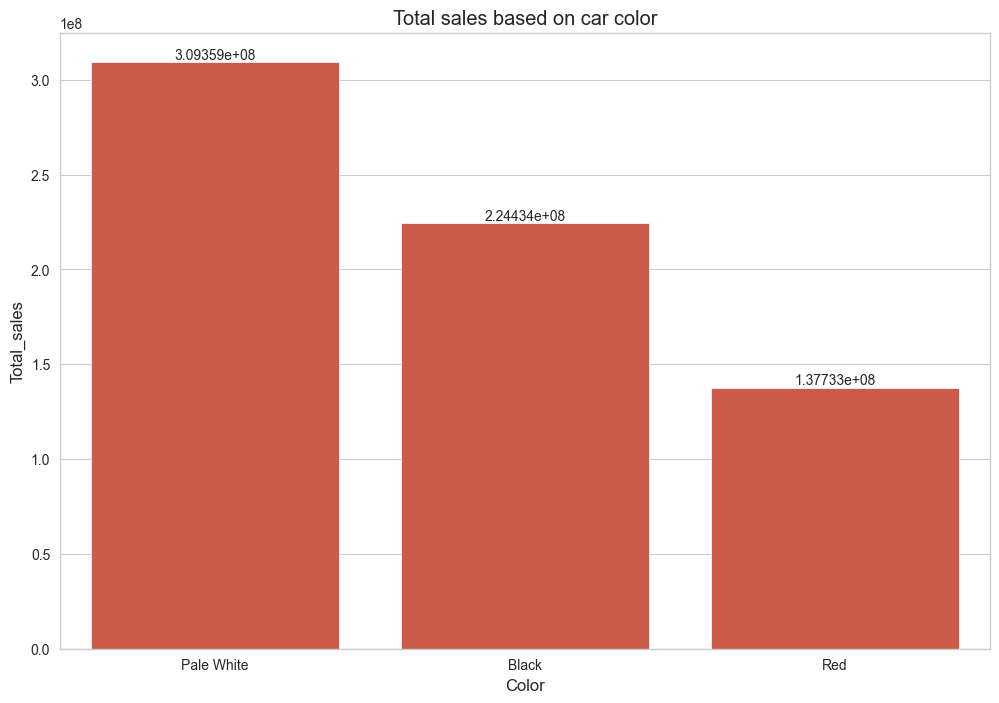

In [85]:
sales_by_Car_color = df.groupby('Color').agg(Total_sales = ("price",'sum'))
color_df=sales_by_Car_color.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data=color_df, x='Color', y='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total sales based on car color')
plt.show()

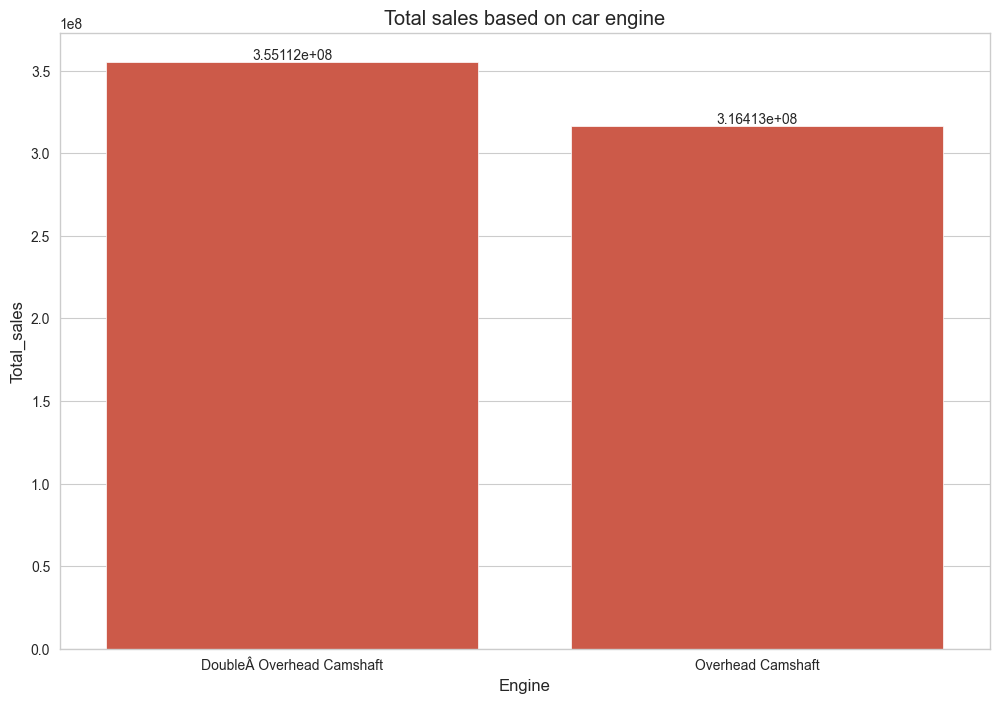

In [83]:
sales_by_Car_Engine = df.groupby('Engine').agg(Total_sales = ("price",'sum'))
Engine_df=sales_by_Car_Engine.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data=Engine_df, x='Engine', y='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total sales based on car engine')
plt.show()

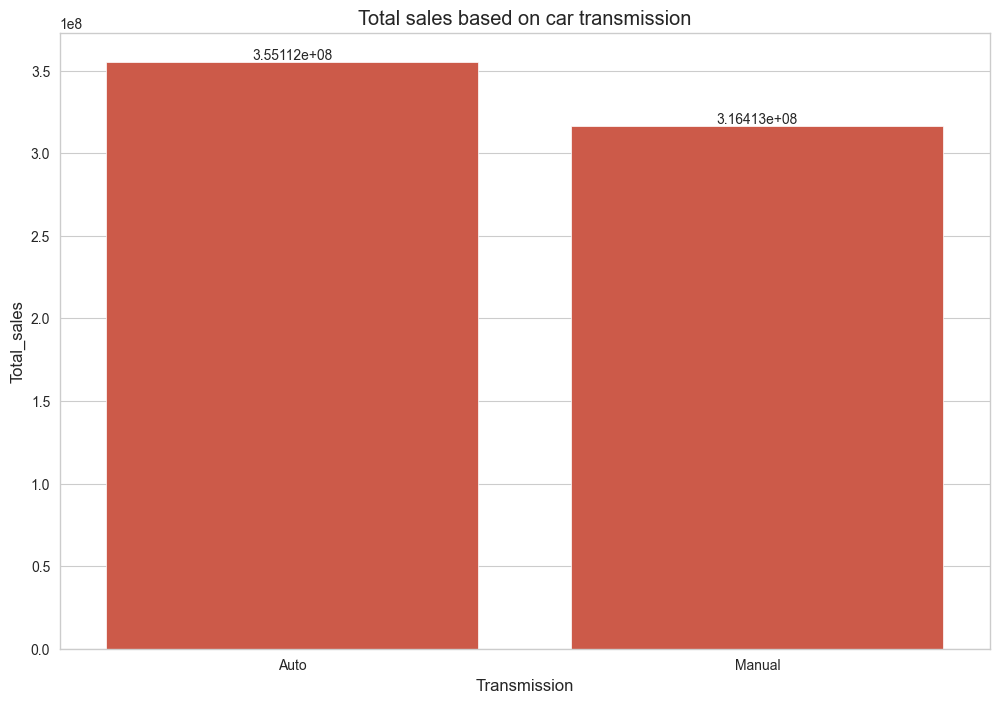

In [82]:
sales_by_Car_Transmission = df.groupby('Transmission').agg(Total_sales = ("price",'sum'))
Transmission_df=sales_by_Car_Transmission.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data=Transmission_df, x='Transmission', y='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total sales based on car transmission')
plt.show()

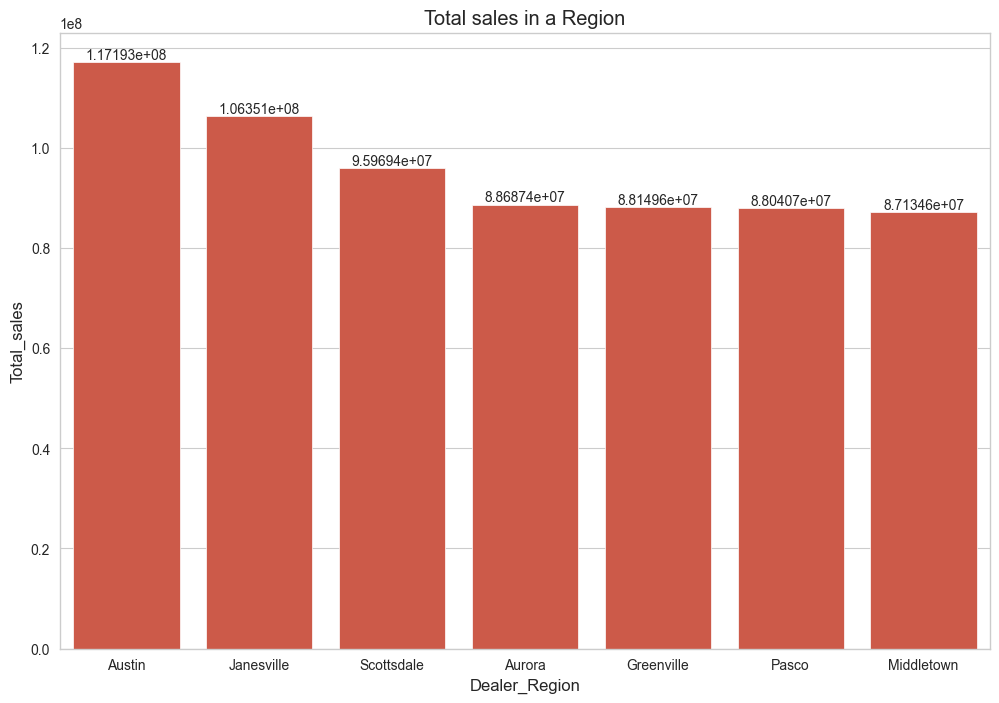

In [81]:
sales_by_Dealer_Region = df.groupby('Dealer_Region').agg(Total_sales = ("price",'sum'))
Dealer_Region_df=sales_by_Dealer_Region.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data = Dealer_Region_df, x='Dealer_Region', y='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total sales in a Region')
plt.show()

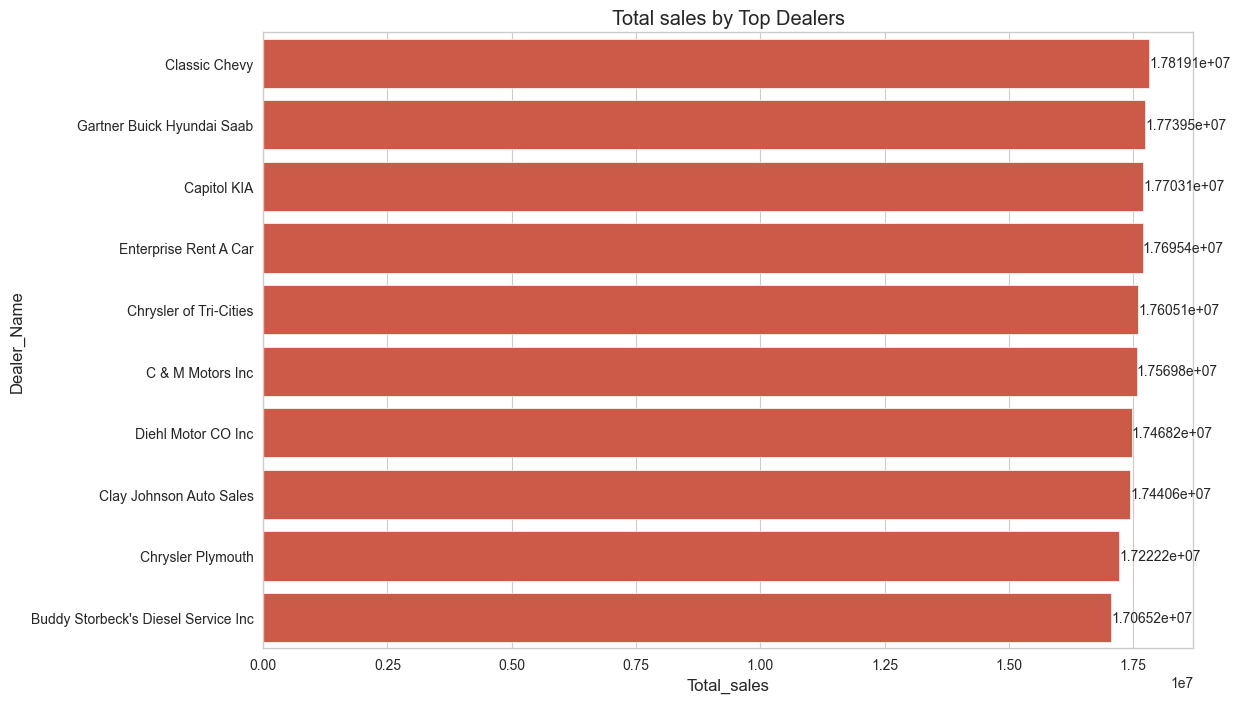

In [120]:
sales_by_Dealer_Name = df.groupby('Dealer_Name').agg(Total_sales = ("price",'sum')).head(10)
Dealer_Name_df=sales_by_Dealer_Name.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data = Dealer_Name_df, y='Dealer_Name', x='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total sales by Top Dealers')
plt.show()

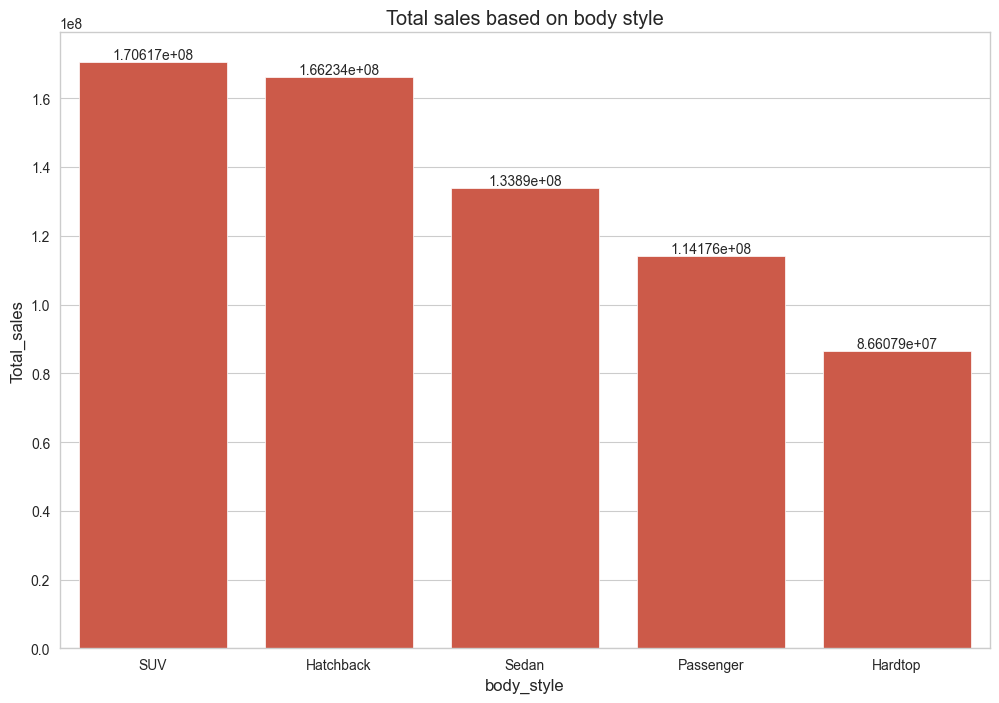

In [78]:
sales_by_body_style = df.groupby('body_style').agg(Total_sales = ("price",'sum'))
body_style_df=sales_by_body_style.sort_values(by ="Total_sales", ascending =False)

ax= sns.barplot(data = body_style_df, x='body_style', y='Total_sales')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Total sales based on body style')
plt.show()